In [1]:
import import_ipynb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition

In [2]:
from Data_investigation import load_and_combine
from Data_investigation import filter_data
from Data_investigation import drop_columns
from Data_investigation import split_column_types
from Data_investigation import restructure_data

importing Jupyter notebook from Data_investigation.ipynb


In [3]:
path1='./ka_devices.db'
path2='./ka_users.csv'
path3='./ka_actions.parquet'
columns_drop=['game_stats_tutorial_complete','index','device_os_s','device_mapped_s','geo_s','device_manufacturer_s','device_model_s','device_gpu_s','lang_s']

In [4]:
df=load_and_combine(path1,path2,path3)

In [5]:
df,s_nlls=filter_data(df)

In [6]:
df=drop_columns(df,columns_drop)

In [7]:
types,cat_types,cluster_types= split_column_types(df)

In [9]:
df=restructure_data(df,cluster_types)

In [10]:
###select only numerical columns for PCA 
Xc=df[cluster_types].copy()
Xc.fillna(Xc.mean(),inplace=True)
### standardize data 
scaler=StandardScaler()
Xc=scaler.fit_transform(Xc)
## convert back to datframe 
Xc=pd.DataFrame(Xc,columns=cluster_types)

In [11]:
## 2 Principal components to capture the most variablility 
pca = decomposition.PCA(n_components=2)
Xc = pca.fit_transform(Xc)

In [12]:
## Observe how much vriation is captured 
pca.explained_variance_ratio_.cumsum()

array([0.29218752, 0.50516628])

In [13]:
## Use loadings as a method to cluster variables rather than samples 
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'],index=cluster_types)

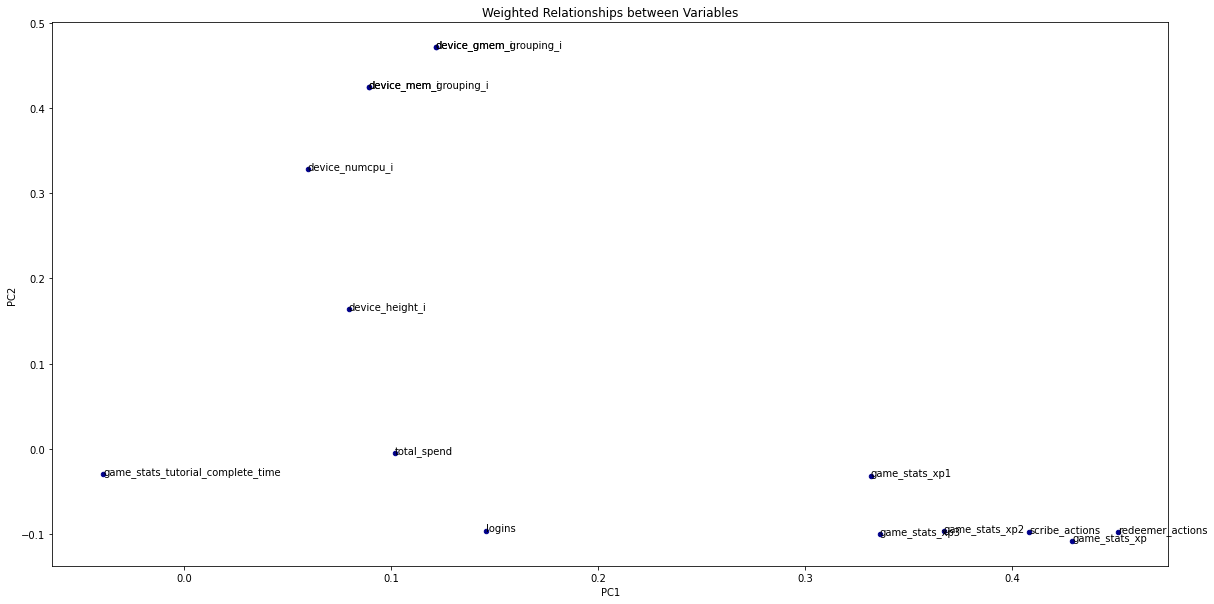

In [14]:
#plot the information to visually determine which are close to each other 
ax1 = loadings.plot.scatter(x='PC1',
                      y='PC2',
                      c='DarkBlue',figsize=(20,10),
                      title= 'Weighted Relationships between Variables')
for k, v in loadings.iterrows():
    ax1.annotate(k, v)

In [15]:
## With 50% variation captured in the numerical data, we select game_stats_tutorial_complete_time, logins
# Compare with Xgboost